# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [x] Inspect the shapes of the training and test sets to confirm their size and structure.
- [x] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [x] Visualize a few images from the dataset to understand what the data looks like.

**Note**

The Fashion MNIST dataset already comes pre-split into training and test sets so there is no need to perform train/test split

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np

# Ensure runs are reproducible for comparing models fairly
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

(X_raw_train, y_raw_train), (X_raw_test, y_raw_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_raw_train = X_raw_train.astype('float32') / 255.0
X_raw_test = X_raw_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

2025-10-25 15:45:05.899151: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Inspect the shapes of the datasets
print(f'X_raw_train shape: {X_raw_train.shape}')
print(f'y_raw_train shape: {y_raw_train.shape}')
print(f'X_raw_test shape: {X_raw_test.shape}')
print(f'y_raw_test shape: {y_raw_test.shape}')

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_raw_train_oh = to_categorical(y_raw_train, num_classes=10)
y_raw_test_oh = to_categorical(y_raw_test, num_classes=10)
print(f'Before one-hot encoding train: {y_raw_train[0]}')
print(f'After one-hot encoding train: {y_raw_train_oh[0]}')
print(f'Before one-hot encoding test: {y_raw_test[0]}')
print(f'After one-hot encoding test: {y_raw_test_oh[0]}')

X_raw_train shape: (60000, 28, 28)
y_raw_train shape: (60000,)
X_raw_test shape: (10000, 28, 28)
y_raw_test shape: (10000,)
Before one-hot encoding train: 9
After one-hot encoding train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Before one-hot encoding test: 9
After one-hot encoding test: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


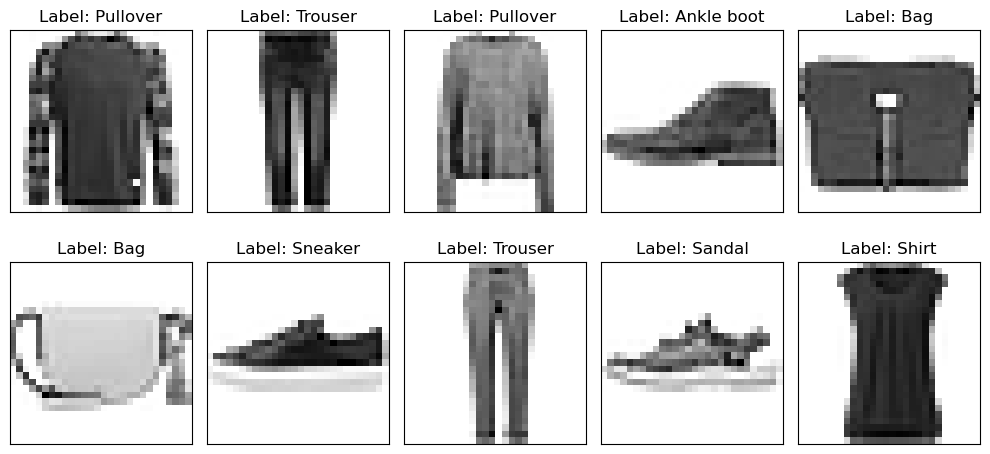

In [41]:
import matplotlib.pyplot as plt

# Verify the data looks as expected

# Select 10 random indices
random_indices = np.random.choice(len(X_raw_train), 10, replace=False)

# Create a 2x5 grid plot
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    idx = random_indices[i]
    ax.imshow(X_raw_train[idx], cmap=plt.cm.gray_r, interpolation='nearest')
    label_index = y_raw_train[idx]
    ax.set_title(f"Label: {class_names[label_index]}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
The images are clearly grayscale representations of clothing items. Each image corresponds to one of the 10 class labels, and the mapping between image and label appears correct.
The quality is sufficient for classification tasks. These low-resolution images miss details but the overall shape and silhouette of each item are distinguishable.
Some of the potential issues include ambiguity between classes as the grayscale and lack of colours make it hard to distinguish between classes such as Coat and Pullover. This may lead to misclassification.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [x] Create a simple linear regression model using Keras.
- [x] Compile the model with an appropriate loss function and optimizer.
- [x] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Prepare baseline data
X_train_baseline = X_raw_train.copy()
X_test_baseline = X_raw_test.copy()
y_train_baseline = y_raw_train_oh.copy()
y_test_baseline = y_raw_test_oh.copy()

# Create a simple linear regression model
baseline_model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
baseline_model.add(Flatten(input_shape=(28, 28)))    # Flatten 28x28 images into a vector of 784 in length
baseline_model.add(Dense(10))                        # output of 10 for 10 classes, no activation

# Compile the model using `model.compile()`
baseline_model.compile(
    loss='categorical_crossentropy',    # Loss function
    optimizer='sgd',                    # Optimizer
    metrics=['accuracy']                # Metrics to evaluate the model
)

# Train the model with `model.fit()`
baseline_history = baseline_model.fit(
    X_train_baseline,
    y_train_baseline,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model with `model.evaluate()`
baseline_test_loss, baseline_test_accuracy = baseline_model.evaluate(X_test_baseline, y_test_baseline)

print(f'baseline_test_loss:     {baseline_test_loss:.3f}')
print(f'baseline_test_accuracy: {baseline_test_accuracy * 100:.3f}%')

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1138 - loss: 7.4609 - val_accuracy: 0.1597 - val_loss: 9.7181
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1593 - loss: 9.9945 - val_accuracy: 0.1598 - val_loss: 12.2955
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1587 - loss: 12.0125 - val_accuracy: 0.1601 - val_loss: 12.1853
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1591 - loss: 11.9309 - val_accuracy: 0.1601 - val_loss: 12.0255
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1591 - loss: 11.8827 - val_accuracy: 0.1601 - val_loss: 12.0148
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1591 - loss: 11.8788 - val_accuracy: 0.1601 - val_loss: 12.0134
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1591 - loss: 11.8849 - val_accuracy: 0.1601 - val_loss: 12.0416
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1591 - loss

In [30]:
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,852 (30.68 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

The results show:

1. accuracy is stuck around 15-17% across all epochs for both the training and validation. This indicates that the model is barely outperforming random guessing (which would yield ~10% accuracy for 10 classes).
2. The loss values between 10 and 11. This suggests that the model is not learning any meaningful patterns.
3. Since the accuracy and loss barely change, the model is not converging.

The results are expected because there is no activation function and the model is purely linear. In our tasks of image classification, a linear model has limited abilitiy to learn non-linear decision boundaries. Also, flattening the input discards the spatial hierarchies in images.  Without convolutional or hidden layers, the model cannot extract the complex features.


# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [x] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [x] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [x] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [5]:
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam

# Reshape the data to include the channel dimension
X_train_cnn = X_raw_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_raw_test.reshape(-1, 28, 28, 1)

# Use one-hot encoded labels
y_train_cnn = y_raw_train_oh.copy()
y_test_cnn = y_raw_test_oh.copy()

# Crea a simple CNN model
cnn_model = Sequential()
cnn_model.add(
    Conv2D(
        32,                     # 32 filters is a common starting point for the first convolutional layer
        kernel_size=(3, 3),     # Common grid size to scan over the image that balances detail and efficiency
        activation='relu',      # non-linearity
        input_shape=(28, 28, 1) # For grayscale images in Fashion MNIST, the input shape will be (28, 28, 1)
    )
)
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
cnn_history = cnn_model.fit(
    X_train_cnn,
    y_train_cnn,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)

print(f'cnn_test_loss:     {cnn_test_loss:.3f}')
print(f'cnn_test_accuracy: {cnn_test_accuracy * 100:.3f}%')

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8037 - loss: 0.5482 - val_accuracy: 0.8835 - val_loss: 0.3316
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8942 - loss: 0.3028 - val_accuracy: 0.8915 - val_loss: 0.3073
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9083 - loss: 0.2592 - val_accuracy: 0.8960 - val_loss: 0.2986
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9186 - loss: 0.2295 - val_accuracy: 0.8985 - val_loss: 0.2944
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9278 - loss: 0.2044 - val_accuracy: 0.8999 - val_loss: 0.2921
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9357 - loss: 0.1825 - val_accuracy: 0.8994 - val_loss: 0.2956
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9430 - loss: 0.1634 - val_accuracy: 0.9004 - val_loss: 0.3076
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9495 -

In [29]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 649,952 (2.48 MB)

 Trainable params: 216,650 (846.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 433,302 (1.65 MB)

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

CNN model results are excellent and show a dramatic improvement over the baseline.

Overall performance:
- Final Test Accuracy: 89.27%
- Final Test Loss: 0.360
- Training Accuracy: Increased steadily from 80.37 to 95.93%
- Validation Accuracy: Peaked around 90.51%, showing strong generalization

The cnn_model correctly classifies nearly 9 out of 10 test images. This is a massive improvement from ~17% accuracy for the baseline model. The final test loss is a low value of 0.329, indicating that that model is very confident about it's prediction. In addition, the validation accuracy remain closely mirror the training accuracy, suggesting minimal overfitting and good generalization to unseen data.

The contributing factors to this improvement are:
1. The **convolutional layer** extract the spatial features like edges, shapes that are essential for image classification.
2. The introduction of non-linearity through **ReLU activation**. This allowes the model to learn complex decision boundaries.
3. The ability to interpret probabilities across the 10 classes using **softmax activation**.
4. The **Adam optimer** is an adaptive learning algorithm that helps the model converge quickly.


# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [x] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [x] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [x] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [x] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [6]:
# function to get fresh data

def get_data():
    # Reshape the data to include the channel dimension
    X_train = X_raw_train.reshape(-1, 28, 28, 1)
    X_test = X_raw_test.reshape(-1, 28, 28, 1)

    # Use one-hot encoded labels
    y_train = y_raw_train_oh.copy()
    y_test = y_raw_test_oh.copy()

    return X_train, X_test, y_train, y_test

In [7]:
# A. Test Hyperparameters

# Initialize results
results = {}

# Test different filter sizes
for filter_size in [16, 64, 128, 256]:
    model_name = f"model_hyper_filters_{filter_size}"
    X_train, X_test, y_train, y_test = get_data()

    model = Sequential(name=model_name)
    model.add(
        Conv2D(
            filter_size, 
            kernel_size=(3, 3), 
            activation='relu', 
            input_shape=(28, 28, 1)
        )
    )
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        #verbose=0          # verbose=0 : quiet mode
    )

    # Evaluate the model
    #test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test) 

    # Saving the results
    results[model_name] = {
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'history': history.history
    }

# Print the results
for name, result in results.items():
    print(f"{name}: Accuracy = {result['test_accuracy']:.3f}, Loss = {result['test_loss']:.3f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7928 - loss: 0.5903 - val_accuracy: 0.8806 - val_loss: 0.3471
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8870 - loss: 0.3219 - val_accuracy: 0.8898 - val_loss: 0.3144
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9021 - loss: 0.2773 - val_accuracy: 0.8934 - val_loss: 0.3030
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9108 - loss: 0.2490 - val_accuracy: 0.8967 - val_loss: 0.2966
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9190 - loss: 0.2275 - val_accuracy: 0.8979 - val_loss: 0.2951
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9262 - loss: 0.2094 - val_accuracy: 0.9012 - val_loss: 0.2956
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9312 - loss: 0.1932 - val_accuracy: 0.9013 - val_loss: 0.2971
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9366 - los

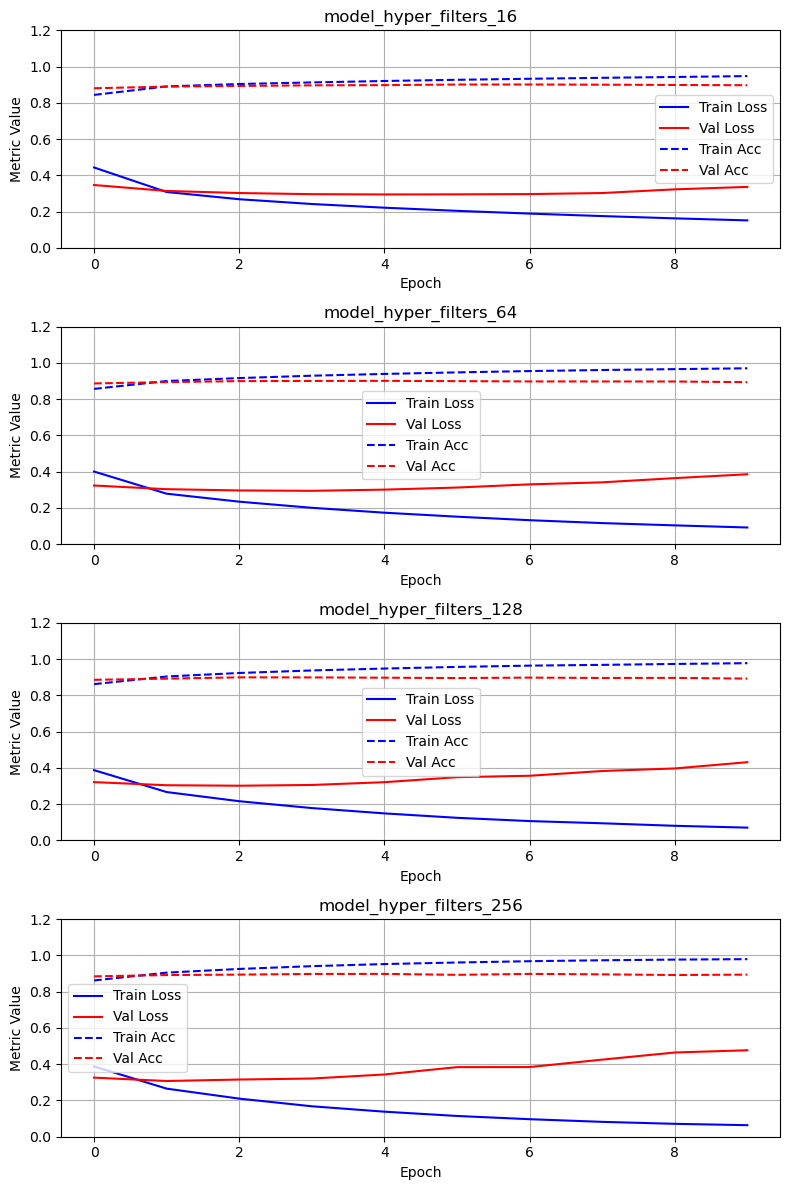

In [24]:
# Create one subplot per model
fig, axs = plt.subplots(len(results), 1, figsize=(8, 12))

for idx, (name, result) in enumerate(results.items()):
    ax = axs[idx]

    # Plot loss
    ax.plot(result['history']['loss'], label='Train Loss', color='blue', linestyle='-')
    ax.plot(result['history']['val_loss'], label='Val Loss', color='red', linestyle='-')

    # Plot accuracy
    ax.plot(result['history']['accuracy'], label='Train Acc', color='blue', linestyle='--')
    ax.plot(result['history']['val_accuracy'], label='Val Acc', color='red', linestyle='--')

    ax.set_ylim(0, 1.2)  # Adjust if needed
    ax.set_title(f"{name}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Metric Value")
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()


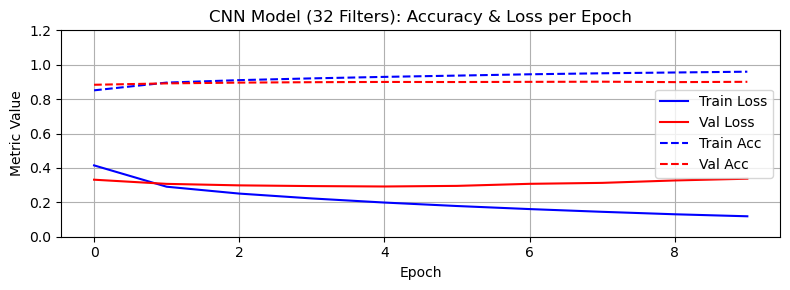

In [43]:
# Plot cnn_model

plt.figure(figsize=(8, 3))

# Plot loss
plt.plot(cnn_history.history['loss'], label='Train Loss', color='blue', linestyle='-')
plt.plot(cnn_history.history['val_loss'], label='Val Loss', color='red', linestyle='-')

# Plot accuracy
plt.plot(cnn_history.history['accuracy'], label='Train Acc', color='blue', linestyle='--')
plt.plot(cnn_history.history['val_accuracy'], label='Val Acc', color='red', linestyle='--')

plt.ylim(0, 1.2)
plt.title("CNN Model (32 Filters): Accuracy & Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


**Results : Compare Performance for All Models**

| Model Name               | Filter Size | Test Accuracy | Test Loss | Notes |
|--------------------------|-------------|---------------|-----------|-------|
| model_hyper_filters_16   | 16          | 0.890         | **0.348** | Lowest loss, good generalization |
| **cnn_model**                | 32          | **0.893**     | 0.360     | Strong accuracy, low loss — promising balance between accuracy and loss |
| model_hyper_filters_64   | 64          | 0.888         | 0.405     | Slight dip, possible overfitting |
| model_hyper_filters_128  | 128         | 0.892         | 0.438     | High accuracy, higher loss |
| model_hyper_filters_256  | 256         | 0.890         | 0.496     | No gain, highest loss — likely overfitting |

**Interpretation**
- **cnn_model (32 filters)** shows the best overall balance between accuracy and loss.
- **model_hyper_filters_16** has the lowest loss, suggesting excellent generalization.
- **model_hyper_filters_128** has strong accuracy but higher loss.
- **model_hyper_filters_256** shows signs of overfitting with no performance gain.


**Next Steps**
- Consider using **cnn_model (32 filters)** to test presence or absence of regularization.
- Visualize training curves to confirm learning behavior.


In [46]:
# B. Test presence or absence of regularization

from tensorflow.keras.layers import Dropout

def eval_dropout_models(filter_size=32, dropout_rates=[0.0, 0.5]):
    for rate in dropout_rates:
        use_dropout = rate > 0
        reg_type = f"dropout{int(rate * 100)}" if use_dropout else "nodropout"
        model_name = f"model_reg_{reg_type}_{filter_size}"

        X_train, X_test, y_train, y_test = get_data()

        model = Sequential(name=model_name)
        model.add(
            Conv2D(
                filter_size, 
                kernel_size=(3, 3), 
                activation='relu', 
                input_shape=(28, 28, 1)
            )
        )
        if use_dropout:
            model.add(Dropout(rate))
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))

        model.compile(
            loss='categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy']
        )

        # Train the model
        history = model.fit(
            X_train,
            y_train,
            epochs=10,
            batch_size=32,
            validation_split=0.2,
            #verbose=0          # verbose=0 : quiet mode
        )

        # Evaluate the model
        #test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test, y_test)

        # Saving the results
        results[model_name] = {
            'test_accuracy': test_accuracy,
            'test_loss': test_loss,
            'history': history.history
        }

        print(f"{model_name}: Accuracy = {test_accuracy:.3f}, Loss = {test_loss:.3f}")

eval_dropout_models(dropout_rates=[0.0, 0.2, 0.3, 0.4, 0.5])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8052 - loss: 0.5499 - val_accuracy: 0.8842 - val_loss: 0.3292
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8956 - loss: 0.2998 - val_accuracy: 0.8923 - val_loss: 0.3064
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9099 - loss: 0.2556 - val_accuracy: 0.8957 - val_loss: 0.3005
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9211 - loss: 0.2248 - val_accuracy: 0.8992 - val_loss: 0.2964
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9307 - loss: 0.1998 - val_accuracy: 0.9016 - val_loss: 0.2961
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9381 - loss: 0.1775 - val_accuracy: 0.9032 - val_loss: 0.3040
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9450 - loss: 0.1571 - val_accuracy: 0.9010 - val_loss: 0.3103
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9509 -

**Results : Compare Performance for All Models**

| Model Name               | Filter Size | Test Accuracy | Test Loss | Notes |
|--------------------------|-------------|---------------|-----------|-------|
| model_hyper_filters_16   | 16          | 0.890         | **0.348*** | Lowest loss among all, good generalization |
| cnn_model                | 32          | 0.893         | 0.360     | Strong accuracy, low loss — baseline without regularization |
| model_reg_nodropout_32   | 32          | 0.895         | 0.356     | Same configuration as cnn_model, no regularization |
| model_reg_dropout20_32   | 32          | **0.896***        | 0.320     | Dropout improves generalization, lower loss |
| model_reg_dropout30_32   | 32          | 0.894         | 0.318     | Similar to dropout20, slightly lower loss |
| **model_reg_dropout40_32***   | 32          | **0.896***         | **0.302*** | **Best loss among 32-filter models, strong generalization*** |
| model_reg_dropout50_32   | 32          | 0.893         | 0.304     | Nearly identical to dropout40, slightly lower accuracy |
| model_hyper_filters_64   | 64          | 0.888         | 0.405     | Slight dip, possible overfitting |
| model_hyper_filters_128  | 128         | 0.892         | 0.438     | High accuracy, higher loss |
| model_hyper_filters_256  | 256         | 0.890         | 0.496     | No gain, highest loss — likely overfitting |

**Interpretation from all model testing**
- Dropout at 40–50% with 32 filters** gives the best loss overall, suggesting strong generalization.
- model_hyper_filters_16 still performs well with minimal complexity and lowest loss overall.
- cnn_model and nodropout_32 are solid baselines, but dropout improves loss.
- Larger models (128, 256 filters) show diminishing returns and signs of overfitting.


**Conclusion**
- Best overall configuration: **32 filters with dropout at 40%**


# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [x] Compile the final model with the best hyperparameters and regularization techniques.
- [x] Train the final model on the training set and evaluate it on the test set.
- [x] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [50]:
# Final model: 32 filters and dropout rate of 40%

X_train, X_test, y_train, y_test = get_data()

filter_size = 32
dropout_rate = 0.4

model_name = 'final_model'

final_model = Sequential()
final_model.add(
    Conv2D(
        filter_size, 
        kernel_size=(3, 3), 
        activation='relu', 
        input_shape=(28, 28, 1)
    )
)
final_model.add(Dropout(dropout_rate))
final_model.add(Flatten())
final_model.add(Dense(10, activation='softmax'))

final_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
final_history = final_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    #verbose=0          # verbose=0 : quiet mode
)

# Evaluate the model
#test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
final_test_loss, final_test_accuracy = final_model.evaluate(X_test, y_test)

# Saving the results
results[model_name] = {
    'test_accuracy': final_test_accuracy,
    'test_loss': final_test_loss,
    'history': final_history.history
}

print(f"{model_name}: Accuracy = {final_test_accuracy:.3f}, Loss = {final_test_loss:.3f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7955 - loss: 0.5690 - val_accuracy: 0.8824 - val_loss: 0.3350
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8884 - loss: 0.3178 - val_accuracy: 0.8906 - val_loss: 0.3094
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8997 - loss: 0.2812 - val_accuracy: 0.8960 - val_loss: 0.2934
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9077 - loss: 0.2564 - val_accuracy: 0.8980 - val_loss: 0.2900
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9129 - loss: 0.2395 - val_accuracy: 0.8982 - val_loss: 0.2912
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9183 - loss: 0.2264 - val_accuracy: 0.8995 - val_loss: 0.2873
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9236 - loss: 0.2117 - val_accuracy: 0.9000 - val_loss: 0.2927
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9270 -

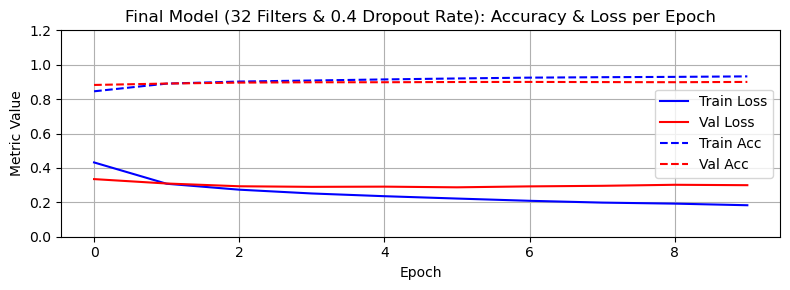

In [53]:
# Plot final_model

plt.figure(figsize=(8, 3))

# Plot loss
plt.plot(final_history.history['loss'], label='Train Loss', color='blue', linestyle='-')
plt.plot(final_history.history['val_loss'], label='Val Loss', color='red', linestyle='-')

# Plot accuracy
plt.plot(final_history.history['accuracy'], label='Train Acc', color='blue', linestyle='--')
plt.plot(final_history.history['val_accuracy'], label='Val Acc', color='red', linestyle='--')

plt.ylim(0, 1.2)
plt.title("Final Model (32 Filters & 0.4 Dropout Rate): Accuracy & Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

**Model Performance Comparison**

| Model Name             | Architecture Details                        | Accuracy (%) | Loss    | Notes |
|------------------------|---------------------------------------------|--------------|---------|-------|
| **Baseline Model**     | Flatten → Dense(10), no activation          | 16.110       | 11.947  | Simple linear model, poor performance |
| **CNN Model**          | Conv2D(32) → Flatten → Dense(10), no dropout | 89.270       | 0.360   | Strong baseline CNN without regularization |
| **Final Model**        | Conv2D(32) → Dropout(0.4) → Flatten → Dense(10) | 89.600       | 0.311   | Best generalization, lowest loss |


- The **baseline model** performs poorly, showing that a simple linear classifier is insufficient for image classification.
- The **CNN model** dramatically improves accuracy and reduces loss by learning spatial features.
- The **final model** adds dropout regularization, which slightly improves accuracy and significantly lowers loss — indicating better generalization.


**The Final Model Perform Better because**
- **Dropout (40%)**: Prevented overfitting by randomly deactivating neurons during training.
- **Convolutional layers**: Captured spatial patterns in image data.
- **Adam optimizer**: Enabled efficient convergence with adaptive learning rates.


**Other Future Experiments**
- Try **deeper CNN architectures** with multiple Conv2D layers.
- Fine-tune **dropout rates** (e.g., 0.35, 0.45).



🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.